## Цель работы

Изучение алгоритмов и методов кластеризации на практике.


## Вариант 2 (7)

Набор данных 2liver.csv
Содержит информацию о заболеваемости печени:
 Возраст пациента
 Пол пациента
 Общий билирубин
 Прямой билирубин
 Щелочная фосфатаза
 Аламиноаминотрансфераза
 Аспартатаминотрансфераза
 Всего белков
 Альбумин
 Соотношение альбуминов и глобулинов
 Цель: поле, используемое для разделения данных на два набора (пациент с заболеванием печени или без заболевания).

## Ход выполнения работы

Перед началом работы импортируются библиотеки, необходимые для выполнения задания.

In [1324]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score, adjusted_mutual_info_score


Выполняется часть 1:
1. пользовать функцию для создания набора данных. 
2. В результате применения получается  DataFrame , содержащий заданное число объектов в каждой группе
(всего 3 группы) с двумя признаками:  'x'  и  'y' .
Получить с помощью этой функции два набора данных
train и test . (выбрать параметр n от 30 до 100), а параметр seed для train и test выбирать разный.
3. Провести стандартизацию данных.
4. С помощью метода  .fit_predict  обучить модель для кластеризации методом Kmeans для трёх кластеров. Получить метки кластеров.
5. Провести визуализацию кластеров с помощью scatter . Пометить на графике центры кластеров. Покрасить объекты из разных кластеров разными цветами.
6. Использовать тестовые данные test и выполнить предсказание с помощью predict . Построить графики для тестовых данных. Пометить на графике центры кластеров. Покрасить объекты из разных кластеров разными цветами.
7. Подсчитать коэффициент силуэта.
8. Повторить пункты 4-7 для n_clusters = 2 и n_clusters = 4 . Сравнить результаты и сделать выводы.
9. Построить график по “методу локтя и сделать выводы.


Функция для создания набора данных:

In [1325]:
def make_data(n, seed):
    np.random.seed(seed)

    shift_matrix = np.array([[3, 3], [6, 9], [9, 3]])

    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])

    df = pd.DataFrame({"x": data[:, 0], "y": data[:, 1]}, columns=["x", "y"])
    df = df.sample(frac=1.0)
    return df

Создаются тренировочный и тестовый наборы данных.

In [1326]:
train = make_data(100, 1)
test = make_data(90, 2)

Далее данные в этих наборах стандартизируются.

In [1327]:
scaler = StandardScaler()

scaler.fit(train)
train_scaled = scaler.transform(train)
scaler.fit(test)
test_scaled = scaler.transform(test)

Для разного количества кластеров - от 2 до 4 создается 3 модели. Для каждой модели считается коэфицент силуэта, строится график для тренировочных и тестовых данных.

Коэффициент силуэта: 0.479


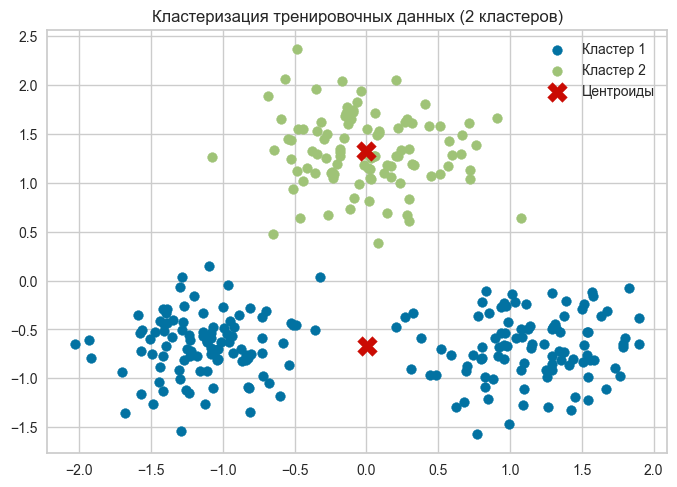

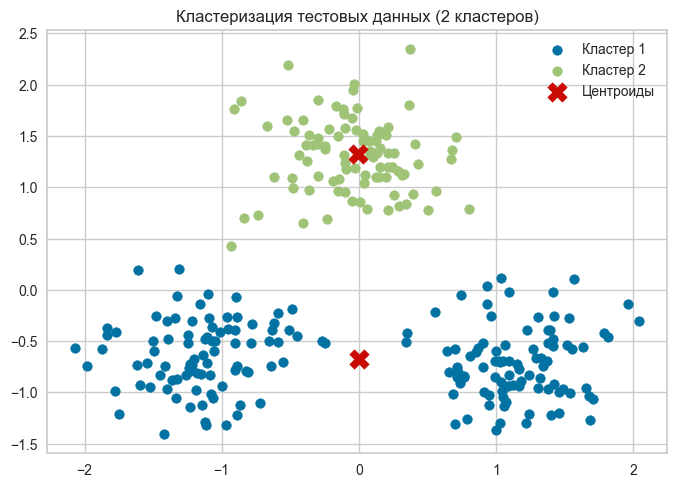

Коэффициент силуэта: 0.704


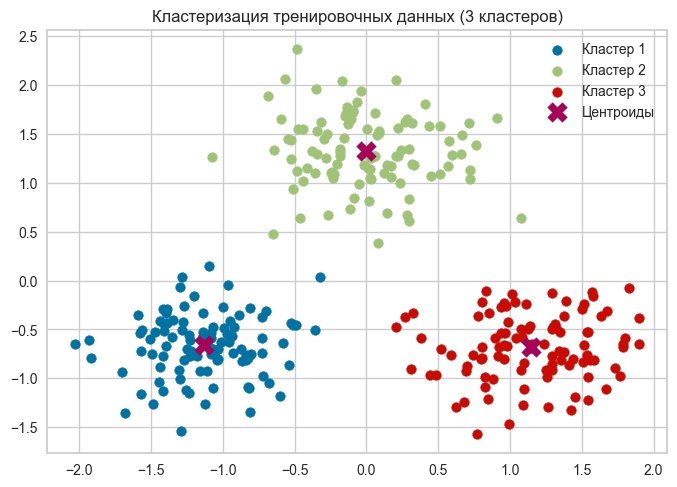

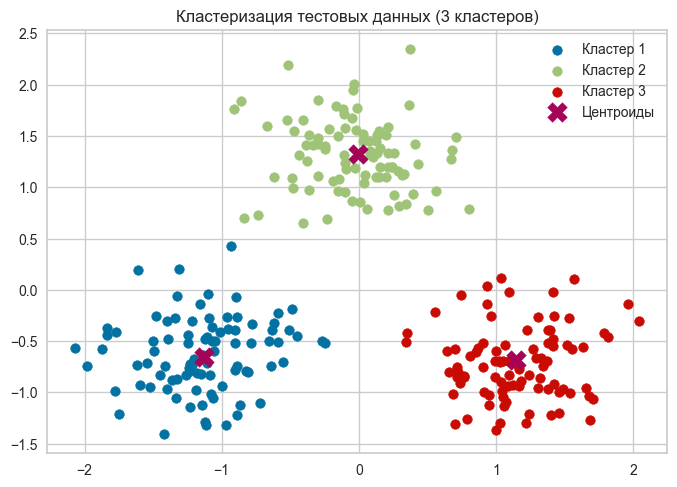

Коэффициент силуэта: 0.564


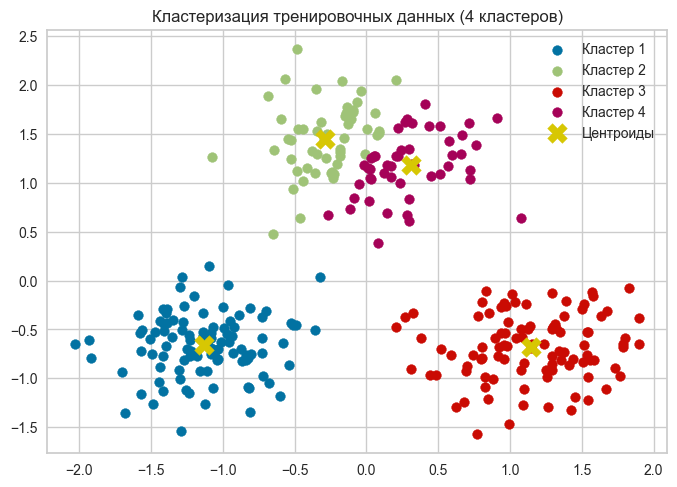

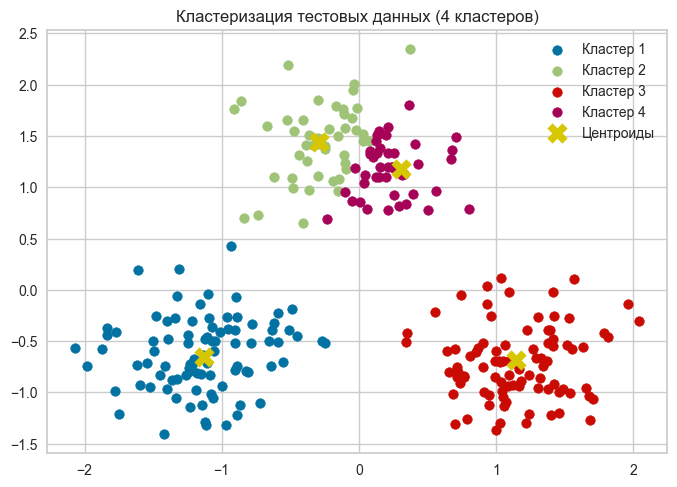

In [1328]:
for number_of_clusters in range(2, 5):
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
    train_labels = kmeans.fit_predict(train_scaled)
    test_labels = kmeans.predict(test_scaled)
    cluster_centers = kmeans.cluster_centers_

    silhouette_avg = silhouette_score(test_scaled, test_labels)
    print(f"Коэффициент силуэта: {silhouette_avg:.3f}")

    for cluster_index in range(number_of_clusters):
        train_cluster_points = train_scaled[train_labels == cluster_index]
        plt.scatter(train_cluster_points[:, 0], train_cluster_points[:, 1], label=f'Кластер {cluster_index+1}')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, marker='X', label='Центроиды')
    plt.title(f'Кластеризация тренировочных данных ({number_of_clusters} кластеров)')
    plt.legend()
    plt.grid(True)
    plt.show()

    for cluster_index in range(number_of_clusters):
        test_cluster_points = test_scaled[test_labels == cluster_index]
        plt.scatter(test_cluster_points[:, 0], test_cluster_points[:, 1], label=f'Кластер {cluster_index+1}')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, marker='X', label='Центроиды')
    plt.title(f'Кластеризация тестовых данных ({number_of_clusters} кластеров)')
    plt.legend()
    plt.grid(True)
    plt.show()


Из полученных результатов можно сделать вывод, что деление данных на 2 или 4 кластера менее эффективно, чем на 3. При делении на каждое количество кластеров коэфицент положительный, а значит данные находятся в подходящих кластерах. Но ближе к 1 коэфицент силуэта который мы получаем при делении на 3 кластера.
После этого строится график по методу локтя, который тоже показывает что оптимальное количество кластеров - 3.

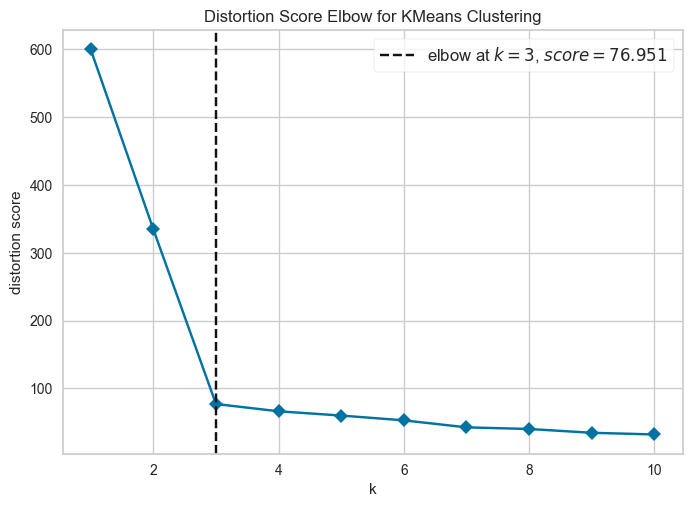

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1329]:
model = KMeans(random_state=0)

visualizer = KElbowVisualizer(model, k=(1, 11), timings=False) # type: ignore
visualizer.fit(train_scaled)
visualizer.show()

Из графика метода локтя видно, что оптимальное число кластеров составляет 3. Это подтверждается тем, что при разделении данных на 3 кластера коэффициент силуэта достигает максимального значения по сравнению с другими вариантами.

Выполняется задание 2:  
1. Загрузить набор данных.
2. Провести предварительную обработку данных.
3. Выделить целевую переменную, которую необходимо предсказать. Не включать эту целевую переменную в модель. Построить матрицу диаграмм рассеяния, выделив значения целевой переменной разными цветами.
4. Выполнить стандартизацию числовых данных с помощью StandardScaler .
5. Выполнить кластеризацию объектов методом k-means . Подобрать оптимальное количество кластеров.
6. Определить объекты, относящиеся к одному кластеру и сделать выводы о каждом кластере. Подсчитать средние показатели по каждому признаку каждого кластера.
7. Вычислить несколько метрик качества.
8. Для получения оценки 5 - выполнить кластеризацию иерархическим агломеративным методом.Построить дендрограмму. Сделать выводы об оптимальном количестве кластеров. Подсчитать средние показатели по каждому признаку каждого кластера.Вычислить несколько метрик качества.
9. Сделать выводе по работе. Описать, какой метод целесообразнее использовать.

Загружается набор данных 2liver.csv

In [1330]:
df = pd.read_csv('2liver.csv', sep=',')
df.head()

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset123
0,65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1


Некорректные наименования столбцов заменяются на корректные.

In [1331]:
df = df.rename(columns={'Dataset123':'Target', 'TotalBilirubin': 'Total_Bilirubin'})
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1


Из данных удаляются пропуски и дубликаты.

In [1332]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         565 non-null    int64  
 1   Gender                      565 non-null    object 
 2   Total_Bilirubin             565 non-null    float64
 3   Direct_Bilirubin            565 non-null    float64
 4   Alkaline_Phosphotase        565 non-null    float64
 5   Alamine_Aminotransferase    565 non-null    int64  
 6   Aspartate_Aminotransferase  565 non-null    object 
 7   Total_Protiens              565 non-null    float64
 8   Albumin                     565 non-null    float64
 9   Albumin_and_Globulin_Ratio  565 non-null    float64
 10  Target                      565 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 53.0+ KB


Данные проверяются на некорректные данные в столбцах.

In [1333]:
for column in df.select_dtypes(include='object').columns:
	print(f'{column}: {df[column].unique()}')

Gender: ['Female' 'Male' 'Mal']
Aspartate_Aminotransferase: ['18' '100' '68' '20' '59' '14' '12' '11' '19' '58' '56' '30' '41' '53'
 '441' '23' '245' '28' '34' '66' '55' '45' '731' '850' '21' '111' '44'
 '57' '80' '36' '77' '73' '50' '110' '47' '576' '15' '178' '27' '960'
 '406' '150' '61' '54' '24' '16' '43' '97' '86' '88' '95' '26' '17' '397'
 '29' '22' '127' '79' '142' '152' '31' '3a4' '350' '794' '400' '202' '630'
 '950' '161' '405' '92' '39' '10' '116' '98' '285' '64' '149' '2946'
 '1600' '1050' '275' '113' '84' '25' '40' '83' '65' '4929' '90' '140'
 '139' '87' '38' '42' '233' '138' '82' '35' '32' '187' '62' '74' '67' '37'
 '602' '63' '99' '103' '145' '247' '114' '104' '51' '60' '1500' '180'
 '148' '46' '13' '85' '231' '156' '89' '298' '48' '130' '75' '500' '105'
 '250' '232' '33' '143' '176' '70' '52' '91' '236' '108' '190' '71' '126'
 '141' '102' '81' '511' '72' '135' '497' '844' '368' '188' '248' '401'
 '76' '221' '235' '185' '230' '540' '181' '155' '200' '186' '623' '220'
 '78

Некорректные данные заменяются на корректные.

In [1334]:
df['Gender'] = df['Gender'].replace('Mal', 'Male')
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [1, 0]).astype(int)
df['Aspartate_Aminotransferase'] = df['Aspartate_Aminotransferase'].replace('3a4', 34).astype(int)
df['Target'] = df['Target'].replace('yes', 1).astype(int)

df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         565 non-null    int64  
 1   Gender                      565 non-null    int64  
 2   Total_Bilirubin             565 non-null    float64
 3   Direct_Bilirubin            565 non-null    float64
 4   Alkaline_Phosphotase        565 non-null    float64
 5   Alamine_Aminotransferase    565 non-null    int64  
 6   Aspartate_Aminotransferase  565 non-null    int64  
 7   Total_Protiens              565 non-null    float64
 8   Albumin                     565 non-null    float64
 9   Albumin_and_Globulin_Ratio  565 non-null    float64
 10  Target                      565 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 48.7 KB


C:\Users\valve\AppData\Local\Temp\ipykernel_6176\1196634205.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(['Male', 'Female'], [1, 0]).astype(int)


В качестве целевой переменной выделяется столбец 'Цель', так как он содержит информацию о наличии заболевания печени. Этот столбец не включается в модель.

In [1335]:
y = df['Target']
x = df.drop('Target', axis=1)

Выполняется стандартизация числовых данных с помощью StandardScaler.

In [1336]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.fit_transform(x)

Выполняется построение графика метода локтя для нахождения оптимального числа кластеров, а также вывод коэффициента силуэта для различных количеств кластеров.

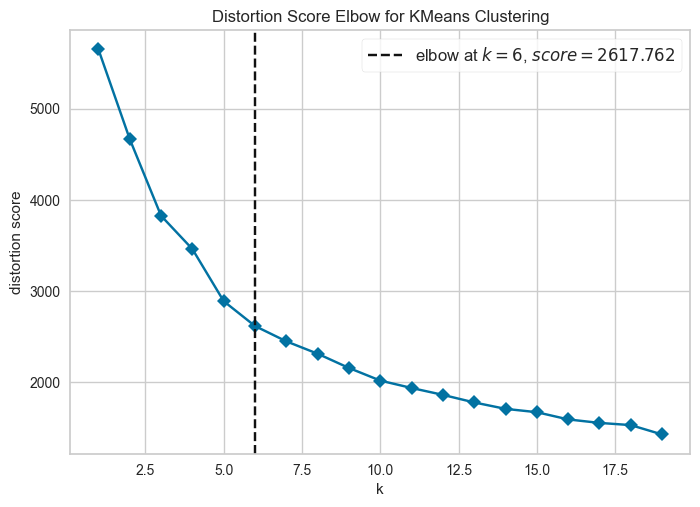

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1337]:
model = KMeans(random_state=0)

visualizer = KElbowVisualizer(model, k=(1, 20), timings=False) # type: ignore
visualizer.fit(x_scaled)
visualizer.show()

In [1338]:
cluster_labels = [None, None]
centroids_by_cluster = [None, None]
for number_of_clusters in range(2, 40):
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
    labels = kmeans.fit_predict(x_scaled)
    cluster_centers = kmeans.cluster_centers_
    
    cluster_labels.append(labels) # type: ignore
    centroids_by_cluster.append(cluster_centers) # type: ignore

    silhouette_avg = silhouette_score(x_scaled, labels)
    print(f"Коэффициент силуэта: {silhouette_avg:.3f} для {number_of_clusters} кластеров")

Коэффициент силуэта: 0.200 для 2 кластеров
Коэффициент силуэта: 0.207 для 3 кластеров
Коэффициент силуэта: 0.212 для 4 кластеров
Коэффициент силуэта: 0.230 для 5 кластеров
Коэффициент силуэта: 0.245 для 6 кластеров
Коэффициент силуэта: 0.236 для 7 кластеров
Коэффициент силуэта: 0.190 для 8 кластеров
Коэффициент силуэта: 0.191 для 9 кластеров
Коэффициент силуэта: 0.200 для 10 кластеров
Коэффициент силуэта: 0.188 для 11 кластеров
Коэффициент силуэта: 0.187 для 12 кластеров
Коэффициент силуэта: 0.193 для 13 кластеров
Коэффициент силуэта: 0.193 для 14 кластеров
Коэффициент силуэта: 0.194 для 15 кластеров
Коэффициент силуэта: 0.195 для 16 кластеров
Коэффициент силуэта: 0.195 для 17 кластеров
Коэффициент силуэта: 0.192 для 18 кластеров
Коэффициент силуэта: 0.193 для 19 кластеров
Коэффициент силуэта: 0.189 для 20 кластеров
Коэффициент силуэта: 0.202 для 21 кластеров
Коэффициент силуэта: 0.191 для 22 кластеров
Коэффициент силуэта: 0.188 для 23 кластеров
Коэффициент силуэта: 0.188 для 24 класте

Лучше всего разделить данные на 6 кластеров, так как при этом коэффициент силуэта максимален. А так же на это значение указывает метод локтя. При этом, при разделении на 6 кластеров, коэффициент силуэта равен 0.245, что говорит о том, что уверенность в правильности разделения данных на кластеры невысока.

Рассмотрим случаи с 6 кластерами.


In [1339]:

cluster_index = 6

df_for_cluster = df.copy()
df_for_cluster['cluster'] = cluster_labels[cluster_index]
cluster_mean = df_for_cluster.groupby('cluster').mean()
print(f'Значения признаков для кластеров, если кластеров {cluster_index}:')
print(cluster_mean)


Значения признаков для кластеров, если кластеров 6:
               Age    Gender  Total_Bilirubin  Direct_Bilirubin  \
cluster                                                           
0        38.096045  1.000000         1.517514          0.664407   
1        44.114286  0.857143        22.605714         10.382857   
2        55.043478  0.695652         6.013043          2.947826   
3        41.175926  0.000000         0.994444          0.325000   
4        35.000000  0.900000        10.380000          4.740000   
5        51.990566  0.919811         2.248113          1.034434   

         Alkaline_Phosphotase  Alamine_Aminotransferase  \
cluster                                                   
0                  229.158192                 58.395480   
1                  349.485714                106.000000   
2                 1194.260870                 89.956522   
3                  229.157407                 41.518519   
4                  459.700000               1255.400000  

Проанализировав данные, можно сделать вывод, что:  

0 кластер: Относительно высокие показатели: Albumin (3.82), Albumin_and_Globulin_Ratio (1.18), Target (1.37). Относительно низкие показатели: Age (38.10). В эту группу попали самые молодые мужчины с высокими показателями Albumin, Albumin_and_Globulin_Ratio и с заболеваниями печени.

1 кластер: Относительно высокие показатели: Total_Bilirubin (22.61), Direct_Bilirubin (10.38), Aspartate_Aminotransferase (189.97). Относительно низкие показатели: Albumin (2.58), Albumin_and_Globulin_Ratio (0.71). В эту группу попали преимущественно мужчины среднего возраста с высокими показателями Total_Bilirubin, Direct_Bilirubin, Aspartate_Aminotransferase и низкими показателями Albumin и Albumin_and_Globulin_Ratio.

2 кластер: Относительно высокие показатели: Age (55.04), Alkaline_Phosphotase (1194.26). Относительно низкие показатели: Total_Protiens (6.21), Albumin (2.72), Albumin_and_Globulin_Ratio (0.75). В эту группу попали самые взрослые люди, в основном мужчины, с высокими показателями Alkaline_Phosphotase и низкими показателями Total_Protiens, Albumin и Albumin_and_Globulin_Ratio.

3 кластер: Относительно высокие показатели: отсутствуют. Относительно низкие показатели: отсутствуют. В эту группу попали только женщины со средними показателями по всем параметрам.

4 кластер: Относительно высокие показатели: Alamine_Aminotransferase (1255.40), Aspartate_Aminotransferase (1646.00), Total_Bilirubin (10.38), Direct_Bilirubin (4.74). Относительно низкие показатели: Age (35.00), Total_Protiens (6.09), Albumin (2.96), Albumin_and_Globulin_Ratio (0.97). В эту группу попали самые молодые люди, преимущественно мужчины, с высокими показателями ферментов печени и низкими уровнями белков.

5 кластер: Относительно высокие показатели: Target (1.25). Относительно низкие показатели: Total_Protiens (5.75), Albumin (2.53), Albumin_and_Globulin_Ratio (0.78). В эту группу попали преимущественно мужчины среднего возраста с низкими показателями белков и со средними значениями ферментов печени.

Можно сказать, что попадание в кластеры 0, 4 говорит о том, что у человека скорее всего есть заболевание печени, а попадание в кластеры 2, 4 говорит о том, что у человека нет заболевания печени.

Вычисляются метрики качества: ari, ami, fmi.

In [1340]:

cluster_index = 6

df_for_cluster = df.copy()
df_for_cluster['cluster'] = cluster_labels[cluster_index]

ari = adjusted_rand_score(y, df_for_cluster['cluster'])
fmi = fowlkes_mallows_score(y, df_for_cluster['cluster'])
ami = adjusted_mutual_info_score(y, df_for_cluster['cluster'])

print(f'ARI для разбивки на 6 кластеров: {ari}')
print(f'FMI для разбивки на 6 кластеров: {fmi}')
print(f'AMI для разбивки на 6 кластеров: {ami}')


ARI для разбивки на 6 кластеров: -0.007187962380534595
FMI для разбивки на 6 кластеров: 0.402287376419522
AMI для разбивки на 6 кластеров: 0.040706537919392126


Все три метрики указывают на то, что кластеризация на 6 кластеров не является хорошей. Эти значения говорят о слабой или почти нулевой связи между найденными кластерами и истинной структурой данных. Возможно, количество кластеров или выбранный метод кластеризации не подходят для вашего набора данных, или данные не имеют явной структуры, которая могла бы быть разделена на 6 кластеров.

Делается попытка разделить данные на разное количество кластеров

In [1341]:
for cluster_index in range(2, 24):
	df_for_cluster = df.copy()
	df_for_cluster['cluster'] = cluster_labels[cluster_index]

	ari = adjusted_rand_score(y, df_for_cluster['cluster'])
	fmi = fowlkes_mallows_score(y, df_for_cluster['cluster'])
	ami = adjusted_mutual_info_score(y, df_for_cluster['cluster'])

	print(f'ARI для разбивки на {cluster_index} кластеров: {ari}')
	print(f'FMI для разбивки на {cluster_index} кластеров: {fmi}')
	print(f'AMI для разбивки на {cluster_index} кластеров: {ami}\n')

ARI для разбивки на 2 кластеров: 0.03680100604673235
FMI для разбивки на 2 кластеров: 0.5609988193877155
AMI для разбивки на 2 кластеров: 0.04484635893837501

ARI для разбивки на 3 кластеров: -0.015264250377224333
FMI для разбивки на 3 кластеров: 0.4881462401770428
AMI для разбивки на 3 кластеров: 0.05114698768914478

ARI для разбивки на 4 кластеров: 0.013929089235646185
FMI для разбивки на 4 кластеров: 0.4338841257192459
AMI для разбивки на 4 кластеров: 0.04730638285680808

ARI для разбивки на 5 кластеров: 0.00762897232153983
FMI для разбивки на 5 кластеров: 0.42648832527035463
AMI для разбивки на 5 кластеров: 0.0446296031552667

ARI для разбивки на 6 кластеров: -0.007187962380534595
FMI для разбивки на 6 кластеров: 0.402287376419522
AMI для разбивки на 6 кластеров: 0.040706537919392126

ARI для разбивки на 7 кластеров: 0.0018483443794994052
FMI для разбивки на 7 кластеров: 0.383751244196408
AMI для разбивки на 7 кластеров: 0.039965407102963486

ARI для разбивки на 8 кластеров: 0.0029

Из этого следует, что ARI, FMI, AMI при любом количестве кластеров меньше 0.5, что говорит о том, что кластеризация не является хорошей. Поэтому, возможно, количество кластеров или выбранный метод кластеризации не подходят для данного набора данных, или данные не имеют явной структуры, которая могла бы быть разделена на кластеры. 

## Выводы

В данной работе были разработаны две модели кластеризации. Первая использовала метод K-means и базировалась на двух признаках. Оптимальное количество кластеров было выбрано с использованием метода локтя, что позволило достичь положительного значения коэффициента силуэта, близкого к 1, свидетельствующего о хорошей способности модели разделять данные.

Вторая модель также применяла K-means, в качестве целевой переменной использовался признак Target, принимающий значения 1 и 2. Метод локтя показал оптимальное количество кластеров равным 6. Внешние метрики, такие как AMI и ARI, имели очень низкие значения, в то время как FMI оказался высоким, несмотря на то, что эта метрика не учитывает случайные совпадения меток. Внутренний коэффициент силуэта также продемонстрировал достаточно низкие значения, указывая на ограничения в качестве кластеризации.